# 7.1 Order to Disorder

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [30]:
N = 10 # number of particles

r = np.random.rand()

i = int(N * r)
i

9

In [35]:
for n in range(8):
    r = np.random.rand()
    i = int(N*r)
    print(i)

9
1
3
0
8
2
1
7


Data structure: array

In [70]:
x = np.empty(N)
y = np.empty(N)

nleft = N
time = 0

for i in range(N):
    x[i] = 0.5 * np.random.rand()
    y[i] = np.random.rand()

In [71]:
def draw(x, y):
    plt.plot(x, y, 'k.')
    plt.plot([0.5, 0.5], [0, 0.45], 'k-')
    plt.plot([0.5, 0.5], [0.55, 1], 'k-')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xticks([])
    plt.yticks([])

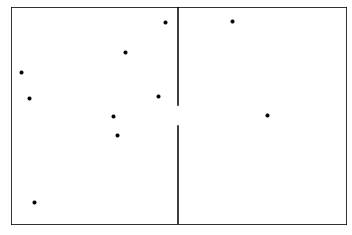

In [76]:
draw(x, y)

In [78]:
nsteps = 15
for n in range(nsteps):
    # step
    r = np.random.rand()

    i = int(N * r)

    if x[i] < 0.5:
        nleft -= 1
        x[i] = 0.5 * (1 + np.random.rand())
        y[i] = np.random.rand()
    else:
        nleft += 1
        x[i] = 0.5 * (np.random.rand())
        y[i] = np.random.rand()

    time += 1

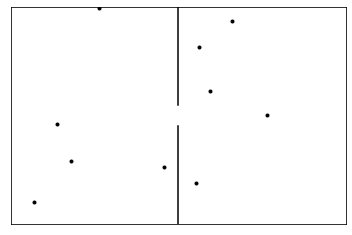

In [79]:
draw(x,y)

Appears to have the basic functionality.

In [136]:
def randombox(N=50, nsteps=100):
    
    x = np.empty(N)
    y = np.empty(N)

    np.random.seed(3800)

    nleft = N
    time = 0

    for i in range(N):
        x[i] = 0.5 * np.random.rand()
        y[i] = np.random.rand()

    rows = []
    for n in range(nsteps):
        row = {'time': time, 'nleft': nleft}
        rows.append(row)

        # step
        r = np.random.rand()

        i = int(N * r)

        if x[i] < 0.5:
            nleft -= 1
            x[i] = 0.5 * (1 + np.random.rand())
            y[i] = np.random.rand()
        else:
            nleft += 1
            x[i] = 0.5 * (np.random.rand())
            y[i] = np.random.rand()

        time += 1
    df = pd.DataFrame(rows)
    
    return df

,time,nleft
7201,7201,1819
7202,7202,1820
7203,7203,1821
7204,7204,1820
7205,7205,1819
...,...,...
9995,9995,1821
9996,9996,1822
9997,9997,1821
9998,9998,1822


In [168]:
def plot_nleft(df):
    N = df.iloc[0].nleft
    
    plt.plot(df.time, df.nleft, label=N)
    plt.xlabel('time')
    plt.ylabel('nleft')
    
    # determine equlibrium
    df = df[df.time > 2*N]
    plt.plot(df.time, df.nleft, linestyle='-', linewidth=4, alpha=0.3, color='k')
    
    n_avg = df.nleft.mean()
    print(n_avg)
    
    Neqm = N / 2
    plt.axhline(Neqm, color='k', linestyle=':')
    

4.026845637583893
8.024079462225343
31.868301083983386
197.93390585933253
399.4032622931301
1831.662022150768


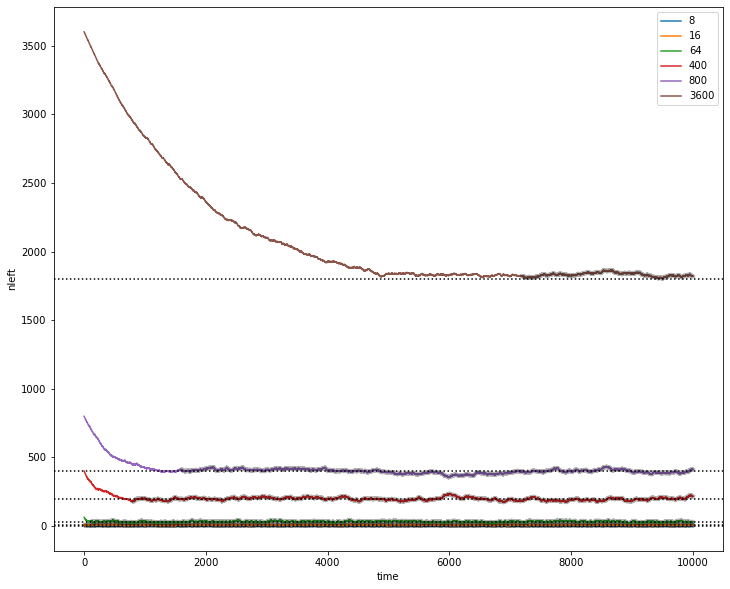

In [169]:
plt.figure(figsize=(12,10))
for N in [8, 16, 64, 400, 800, 3600]:
    nsteps = 10000
    df = randombox(N, nsteps)
    plot_nleft(df)
plt.legend()